In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('../Style.mplstyle')
import pandas as pd
import os
import sys
import scipy
import matplotlib.dates as mdates
from datetime import datetime
sys.path.append('..')
from read_data_functions import *
from plot_functions import *
from calculations import *

In [2]:
parent_path = '../../../../'
path = 'L:/PG-Nanoteknologi/PROJEKTER/2024 Laura og Nan/'

# Screening
Screening_LCS = read_csv(path + 'pilot kbh hovedbanegaard and noerregade/rawdata/particle/Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)

# Brake wear data
Lund_LCS = read_csv(path + 'Lund/Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)
Lund_OPS = read_OPS(path + 'Lund/', parent_path, 0)

# Field data
Field_LCS = read_csv(path + 'cph central and nørreport measurements/Korrigeret low cost sensor/', parent_path, 'Time', 0, 0)
Field_OPS1 = read_OPS(path + 'cph central and nørreport measurements/Station 1/OPS/', parent_path, 0)
Field_OPS2 = read_OPS(path + 'cph central and nørreport measurements/Station 2/OPS/', parent_path, -1)

# Merge dictionaries with data from train stations
DSB_LCS = merge_dicts(Screening_LCS, Field_LCS)
DSB_OPS = merge_dicts(Field_OPS1, Field_OPS2)

In [3]:
DSB_keys_cal = ['2024-09-17 LCS0076', '2024-09-17 LCS0104', 
                '2024-12-09 DG-0158', '2024-12-09 DG-0159',]
Lund_keys_cal = ['2024-10-15 DG-0049', '2024-10-15 DG-0051', '2024-10-15 LCS109', 
                 '2024-10-15 DG-0072', '2024-10-15 DG-0077']

In [4]:
Lund_idx = [[90, 165], [88, 163], [183, 258], [92, 167], [91, 166], [0, -1]] # 2 min running mean
Lund_cal_df = pd.DataFrame()

for idx, key in zip(Lund_idx[:5], Lund_keys_cal):
    print(key)
    df = Lund_LCS[key]
    smoothed_df = running_mean(df, 'PN<2.5', 'PN<2.5', 'Time', '2T', 2, None)
    smoothed_df = smoothed_df.dropna()
    print(smoothed_df.index[idx[0]], smoothed_df.index[idx[1]])
    print(len(smoothed_df.index[idx[0]:idx[1]]))
    Lund_cal_df['Time ' + key.split(' ')[1]] = np.array(smoothed_df.index[idx[0]:idx[1]])
    Lund_cal_df['PN<2.5 ' + key.split(' ')[1]] = np.array(smoothed_df['PN<2.5'][idx[0]:idx[1]])

smoothed_df = running_mean(Lund_OPS['Initial'], 'PN<2.5', 'PN2.5', 'Time', '2T', 2, None)
print('OPS')
print(smoothed_df.index[Lund_idx[-1][0]], smoothed_df.index[Lund_idx[-1][1]])
print(len(smoothed_df.index[Lund_idx[-1][0]:Lund_idx[-1][1]]))
Lund_cal_df['Time OPS'] = np.array(smoothed_df.index[Lund_idx[-1][0]:Lund_idx[-1][1]])
Lund_cal_df['PN<2.5 OPS'] = np.array(smoothed_df['PN<2.5'][Lund_idx[-1][0]:Lund_idx[-1][1]])

2024-10-15 DG-0049
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 DG-0051
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 LCS109
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 DG-0072
2024-10-15 14:00:00 2024-10-15 16:30:00
75
2024-10-15 DG-0077
2024-10-15 14:00:00 2024-10-15 16:36:00
75
OPS
2024-10-15 14:04:00 2024-10-15 16:34:00
75


In [5]:
DSB_idx = [[405,530], [405,530], [370,495], [94,219], [42,167], [44,169]] # 2 min running mean
DSB_cal_df = pd.DataFrame()

for idx, key in zip(DSB_idx[:4], DSB_keys_cal):
    print(key)
    df = DSB_LCS[key]
    smoothed_df = running_mean(df, 'PN<2.5', 'PN<2.5', 'Time', '2T', 2, None)
    print(smoothed_df.index[idx[0]], smoothed_df.index[idx[1]])
    print(len(smoothed_df.index[idx[0]:idx[1]]))
    DSB_cal_df['Time ' + key.split(' ')[1]] = np.array(smoothed_df.index[idx[0]:idx[1]])
    DSB_cal_df['PN<2.5 ' + key.split(' ')[1]] = np.array(smoothed_df['PN<2.5'][idx[0]:idx[1]])

for idx, key in zip(DSB_idx[4:], ['OPS1-CPH-d1', 'OPS2-CPH-d1']):
    print(key)
    df = DSB_OPS[key]
    smoothed_df = running_mean(df, 'PN<2.5', 'PN2.5', 'Time', '2T', 2, None)
    print(smoothed_df.index[idx[0]], smoothed_df.index[idx[1]])
    print(len(smoothed_df.index[idx[0]:idx[1]]))
    DSB_cal_df['Time ' + key.split('-')[0]] = np.array(smoothed_df.index[idx[0]:idx[1]])
    DSB_cal_df['PN<2.5 ' + key.split('-')[0]] = np.array(smoothed_df['PN<2.5'][idx[0]:idx[1]])

2024-09-17 LCS0076
2024-09-17 13:30:00 2024-09-17 17:40:00
125
2024-09-17 LCS0104
2024-09-17 13:30:00 2024-09-17 17:40:00
125
2024-12-09 DG-0158
2024-12-09 12:20:00 2024-12-09 16:30:00
125
2024-12-09 DG-0159
2024-12-09 12:20:00 2024-12-09 16:30:00
125
OPS1-CPH-d1
2024-12-09 12:20:00 2024-12-09 16:30:00
125
OPS2-CPH-d1
2024-12-09 12:20:00 2024-12-09 16:30:00
125


PN<2.5 LCS0104 vs PN<2.5 LCS0076:
Fit: a=0.904165  b=0.000  R=0.366110
PN<2.5 DG-0158 vs PN<2.5 LCS0076:
Fit: a=1.103863  b=0.000  R=-0.005768
PN<2.5 DG-0158 vs PN<2.5 LCS0104:
Fit: a=1.080441  b=0.000  R=-0.321996
PN<2.5 DG-0159 vs PN<2.5 LCS0076:
Fit: a=0.994279  b=0.000  R=0.154360
PN<2.5 DG-0159 vs PN<2.5 LCS0104:
Fit: a=0.989704  b=0.000  R=-0.179515
PN<2.5 DG-0159 vs PN<2.5 DG-0158:
Fit: a=0.787954  b=0.000  R=0.651197
PN<2.5 OPS1 vs PN<2.5 LCS0076:
Fit: a=1.000000  b=0.000  R=0.146776
PN<2.5 OPS1 vs PN<2.5 LCS0104:
Fit: a=1.000000  b=0.000  R=-0.159971
PN<2.5 OPS1 vs PN<2.5 DG-0158:
Fit: a=0.790230  b=0.000  R=0.654629
PN<2.5 OPS1 vs PN<2.5 DG-0159:
Fit: a=1.000000  b=0.000  R=0.987500
PN<2.5 OPS2 vs PN<2.5 LCS0076:
Fit: a=1.191593  b=0.000  R=0.052368
PN<2.5 OPS2 vs PN<2.5 LCS0104:
Fit: a=1.163946  b=0.000  R=-0.312177
PN<2.5 OPS2 vs PN<2.5 DG-0158:
Fit: a=1.000000  b=0.000  R=0.737733
PN<2.5 OPS2 vs PN<2.5 DG-0159:
Fit: a=1.149547  b=0.000  R=0.511475
PN<2.5 OPS2 vs PN<2.5 OPS

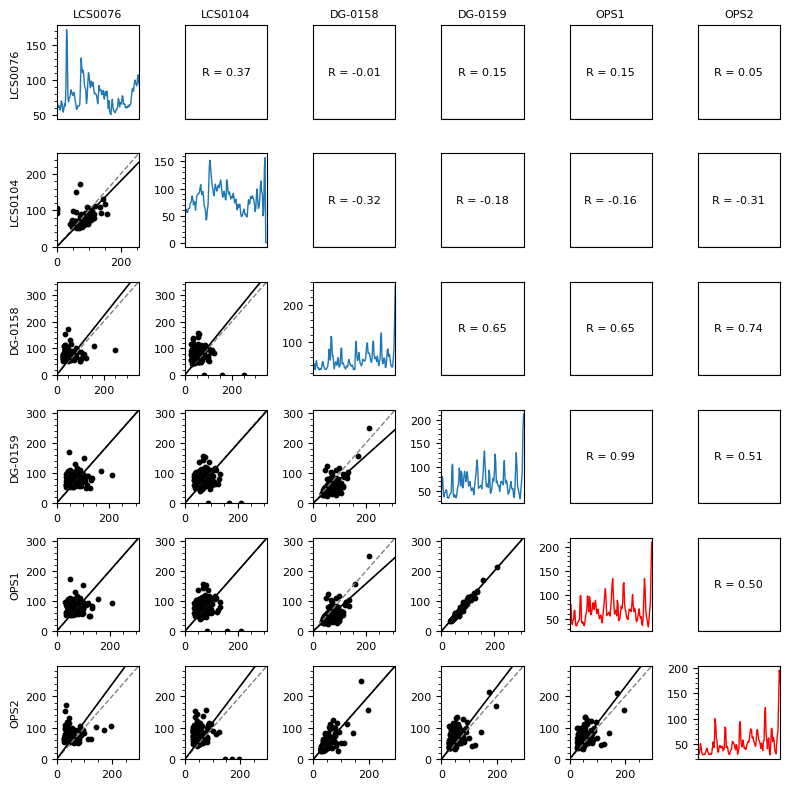

In [6]:
DSB_fig, a_DSB, R2_DSB = LCS_calibration_plot(7, (8, 8), DSB_cal_df, True)
DSB_fig.tight_layout()
DSB_fig.savefig('DSB_LCS_corrected.png', dpi = 600)

PN<2.5 DG-0051 vs PN<2.5 DG-0049:
Fit: a=0.999360  b=0.000  R=0.999853
PN<2.5 LCS109 vs PN<2.5 DG-0049:
Fit: a=0.988331  b=0.000  R=0.993543
PN<2.5 LCS109 vs PN<2.5 DG-0051:
Fit: a=0.989144  b=0.000  R=0.993527
PN<2.5 DG-0072 vs PN<2.5 DG-0049:
Fit: a=1.000428  b=0.000  R=0.999073
PN<2.5 DG-0072 vs PN<2.5 DG-0051:
Fit: a=1.000895  b=0.000  R=0.998813
PN<2.5 DG-0072 vs PN<2.5 LCS109:
Fit: a=0.997078  b=0.000  R=0.992101
PN<2.5 DG-0077 vs PN<2.5 DG-0049:
Fit: a=0.992233  b=0.000  R=0.955014
PN<2.5 DG-0077 vs PN<2.5 DG-0051:
Fit: a=0.992159  b=0.000  R=0.953560
PN<2.5 DG-0077 vs PN<2.5 LCS109:
Fit: a=0.990347  b=0.000  R=0.950947
PN<2.5 DG-0077 vs PN<2.5 DG-0072:
Fit: a=0.992422  b=0.000  R=0.957227
PN<2.5 OPS vs PN<2.5 DG-0049:
Fit: a=1.000000  b=0.000  R=0.965507
PN<2.5 OPS vs PN<2.5 DG-0051:
Fit: a=1.000000  b=0.000  R=0.964055
PN<2.5 OPS vs PN<2.5 LCS109:
Fit: a=1.000000  b=0.000  R=0.960821
PN<2.5 OPS vs PN<2.5 DG-0072:
Fit: a=1.000000  b=0.000  R=0.967180
PN<2.5 OPS vs PN<2.5 DG-007

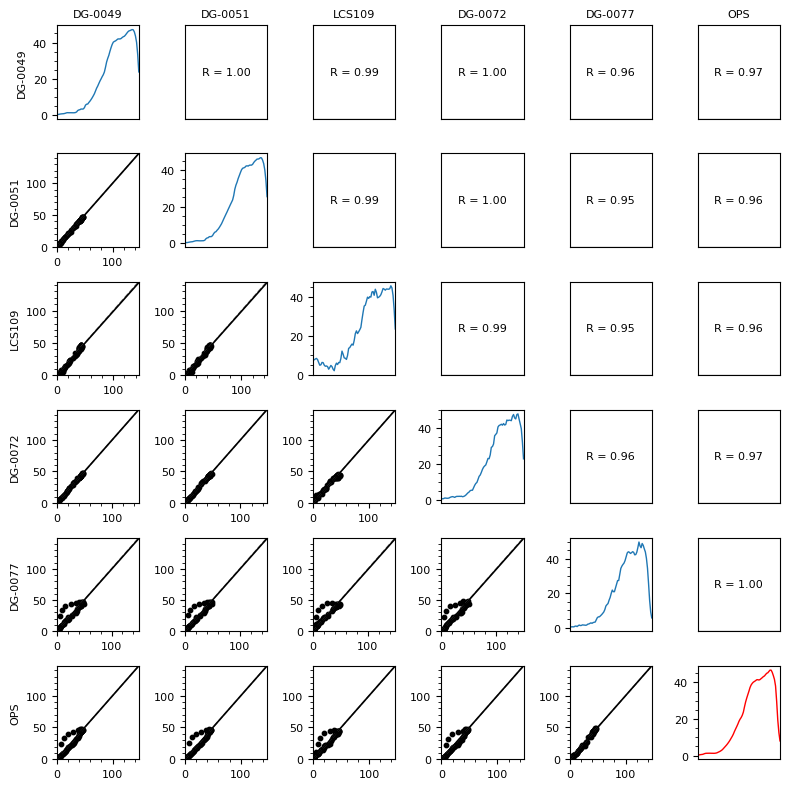

In [7]:
Lund_fig, a_Lund, R2_Lund = LCS_calibration_plot(7, (8, 8), Lund_cal_df, True)
Lund_fig.tight_layout()
DSB_fig.savefig('Lund_LCS_corrected.png', dpi = 600)